In [153]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [4]:
taxi_data = pd.read_csv("../clean_data/TaxiData_Jan17-Jun17.gz", compression="gzip")

In [5]:
taxi_data.shape

(1471188, 7)

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount
0,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,138,262,38.55
1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,138,192,17.30
2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,138,181,50.44
3,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,138,80,21.30
4,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,138,230,42.34


### Add year, month, day, hour columns

In [7]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
taxi_data['year'] = taxi_data['tpep_pickup_datetime'].dt.year
taxi_data['month'] = taxi_data['tpep_pickup_datetime'].dt.month
taxi_data['pickup_day'] = taxi_data['tpep_pickup_datetime'].dt.day
taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour
taxi_data['dropoff_day'] = taxi_data['tpep_dropoff_datetime'].dt.day
taxi_data['dropoff_hour'] = taxi_data['tpep_dropoff_datetime'].dt.hour

### Adding Holiday Column

In [8]:
dr = pd.to_datetime(pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.date)

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

taxi_data['holiday'] = dr.isin(holidays)

In [9]:
dr

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
5         2017-01-01
6         2017-01-01
7         2017-01-01
8         2017-01-01
9         2017-01-01
10        2017-01-01
11        2017-01-01
12        2017-01-01
13        2017-01-01
14        2017-01-01
15        2017-01-01
16        2017-01-01
17        2017-01-01
18        2017-01-01
19        2017-01-01
20        2017-01-01
21        2017-01-01
22        2017-01-01
23        2017-01-01
24        2017-01-01
25        2017-01-01
26        2017-01-01
27        2017-01-01
28        2017-01-01
29        2017-01-01
             ...    
1471158   2017-04-30
1471159   2017-04-30
1471160   2017-04-30
1471161   2017-04-30
1471162   2017-04-30
1471163   2017-04-30
1471164   2017-04-30
1471165   2017-04-30
1471166   2017-04-30
1471167   2017-04-30
1471168   2017-04-30
1471169   2017-04-30
1471170   2017-04-30
1471171   2017-04-30
1471172   2017-04-30
1471173   2017-04-30
1471174   201

In [10]:
holidays

DatetimeIndex(['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29'], dtype='datetime64[ns]', freq=None)

In [57]:
names = cal.holidays(return_name = True)
# data = pd.concat([taxi_data, names], axis=1, join_axes=[taxi_data.tpep_pickup_datetime])

In [58]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,year,month,pickup_day,pickup_hour,dropoff_day,dropoff_hour,holiday
0,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,138,262,38.55,2017,1,1,0,1,0,False
1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,138,192,17.30,2017,1,1,0,1,0,False
2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,138,181,50.44,2017,1,1,0,1,0,False
3,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,138,80,21.30,2017,1,1,0,1,0,False
4,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,138,230,42.34,2017,1,1,0,1,0,False


## Exploratory Data Analysis

### How many trips on Holiday vs Non-Holiday days

In [59]:
taxi_data.holiday.value_counts(), taxi_data.holiday.value_counts(normalize=True)

(False    1434215
 True       36973
 Name: holiday, dtype: int64, False    0.974869
 True     0.025131
 Name: holiday, dtype: float64)

97% of the pickups belong to non-Holiday days while 3% during Holiday dates.

### Avg Trip Duration H vs NH

In [60]:
taxi_data.groupby('holiday', as_index=False)['trip_distance'].mean()

,holiday,trip_distance
0,False,9.846936
1,True,9.762613


In [61]:
type(taxi_data.tpep_pickup_datetime)

pandas.core.series.Series

In [62]:
pickup = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
dropoff = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
taxi_data['trip_duration'] = dropoff-pickup
taxi_data['trip_duration'] = taxi_data['trip_duration'].dt.total_seconds()

In [63]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,year,month,pickup_day,pickup_hour,dropoff_day,dropoff_hour,holiday,trip_duration
0,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,138,262,38.55,2017,1,1,0,1,0,False,931.0
1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,138,192,17.30,2017,1,1,0,1,0,False,576.0
2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,138,181,50.44,2017,1,1,0,1,0,False,1163.0
3,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,138,80,21.30,2017,1,1,0,1,0,False,708.0
4,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,138,230,42.34,2017,1,1,0,1,0,False,1885.0


In [68]:
def calculate_avg_taxis_per_hour(df):
    count_per_hour = df['pickup_hour'].value_counts().sort_index()
    number_of_days = (df['tpep_pickup_datetime'].max() - df['tpep_pickup_datetime'].min()).days
    average_per_hour = count_per_hour / number_of_days
    
    # Plot average number of arrivals at LGA per hour per day
    ax = average_per_hour.plot(kind='bar', title='Average Number of Arriving Flights per Hour per Day at LaGuardia', figsize=(16,8))
    ax.set_ylabel("Average Number of Arrivals")
    ax.set_xlabel("Hour")
    
    return average_per_hour

0     243.288889
1      71.133333
2      18.138889
3       4.183333
4       4.916667
5       9.277778
6      22.905556
7     172.277778
8     295.894444
9     405.316667
10    492.083333
11    476.672222
12    449.400000
13    439.622222
14    474.183333
15    488.755556
16    512.038889
17    537.338889
18    527.844444
19    520.122222
20    490.705556
21    528.588889
22    514.505556
23    474.072222
Name: pickup_hour, dtype: float64

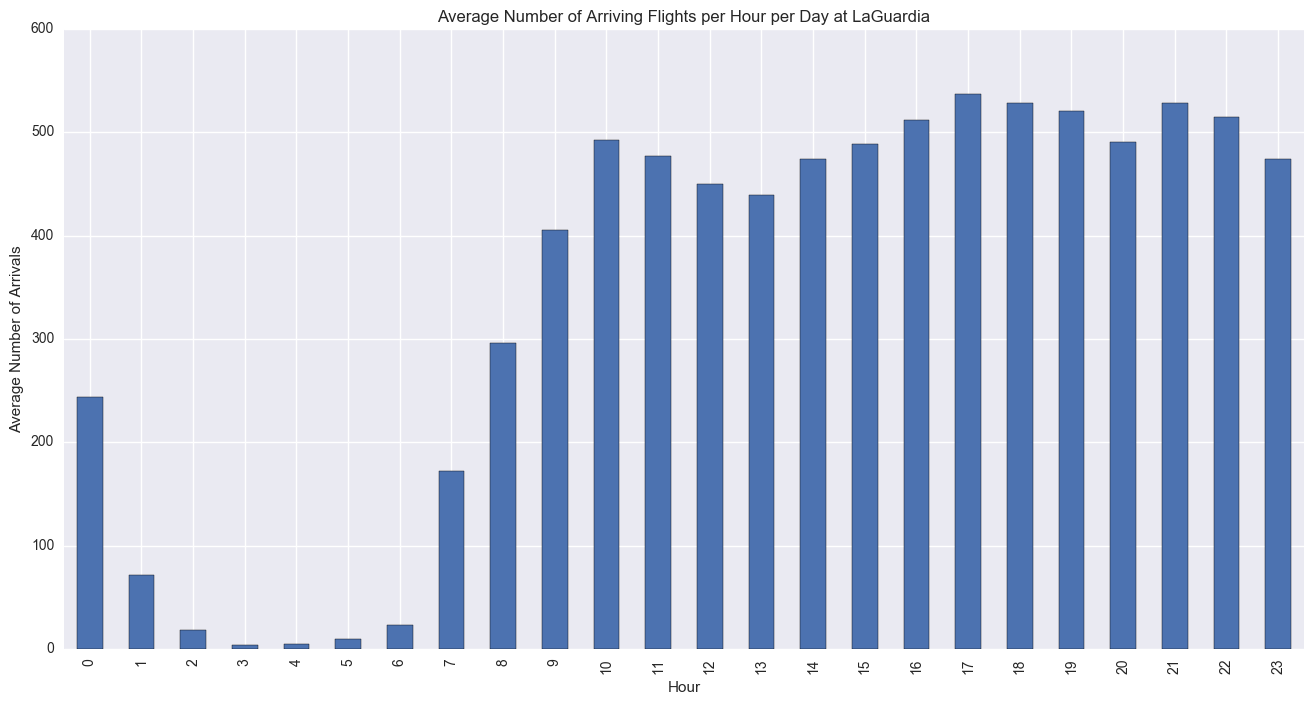

In [69]:
calculate_avg_taxis_per_hour(taxi_data)

In [164]:
def calculate_avg_taxis_per_hour_hol(df):
    count_per_hour = df.groupby('holiday')['pickup_hour'].value_counts().sort_index()
    number_of_days = (df['tpep_pickup_datetime'].max() - df['tpep_pickup_datetime'].min()).days
    average_per_hour = count_per_hour / number_of_days
    new_df = pd.DataFrame({'holiday':average_per_hour.index, 'list':average_per_hour.values}) 
    sns.barplot(x="holiday", y="list", data=new_df)
    return new_df

,holiday,list
0,"(False, 0)",239.511111
1,"(False, 1)",70.900000
2,"(False, 2)",18.133333
3,"(False, 3)",4.172222
4,"(False, 4)",4.777778
5,"(False, 5)",9.122222
6,"(False, 6)",22.588889
7,"(False, 7)",169.377778
8,"(False, 8)",289.744444
9,"(False, 9)",396.816667


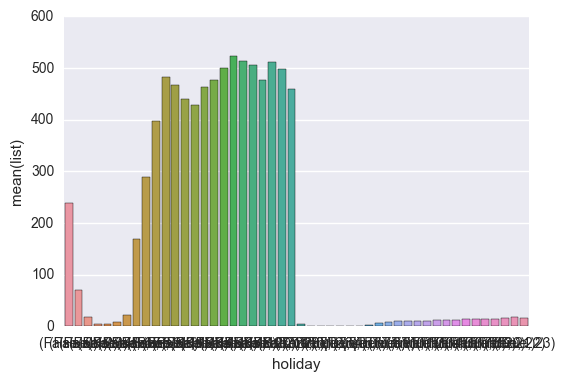

In [165]:
calculate_avg_taxis_per_hour_hol(taxi_data)

In [129]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_duration,holiday,year,month,pickup_day,pickup_hour,dropoff_day,dropoff_hour
0,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,138,262,38.55,931.0,False,2017,1,1,0,1,0
1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,138,192,17.30,576.0,False,2017,1,1,0,1,0
2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,138,181,50.44,1163.0,False,2017,1,1,0,1,0
3,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,138,80,21.30,708.0,False,2017,1,1,0,1,0
4,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,138,230,42.34,1885.0,False,2017,1,1,0,1,0


In [147]:
count_per_hour = taxi_data.groupby(['holiday','pickup_hour']).month.count()

In [148]:
count_df = count_per_hour.unstack(level=0)

In [149]:
count_df["Normal Days"] = count_df[False]/176
count_df["Federal Holidays"] = count_df[True]/4

In [150]:
count_df.head()

holiday,False,True,Normal Days,Federal Holidays
pickup_hour,,,,
0,43112,680,244.954545,170.00
1,12762,42,72.511364,10.50
2,3264,1,18.545455,0.25
3,751,2,4.267045,0.50
4,860,25,4.886364,6.25


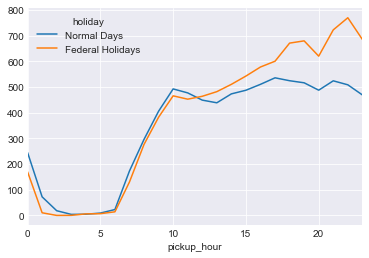

In [154]:

count_df[["Normal Days", "Federal Holidays"]].plot(kind="line")

In [155]:
duration_per_hour = taxi_data.groupby(['holiday','pickup_hour']).trip_duration.sum()

In [157]:
duration_df = duration_per_hour.unstack(level=0)

In [159]:
duration_df["Normal Days"] = duration_df[False]/176
duration_df["Federal Holidays"] = duration_df[True]/4

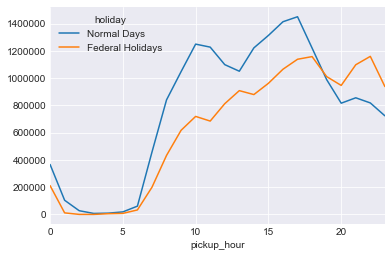

In [160]:
duration_df[["Normal Days", "Federal Holidays"]].plot(kind="line")

In [164]:
distance_per_hour = taxi_data.groupby(['holiday','pickup_hour']).trip_distance.sum()
distance_df = distance_per_hour.unstack(level=0)
distance_df["Normal Days"] = distance_df[False]/176
distance_df["Federal Holidays"] = distance_df[True]/4

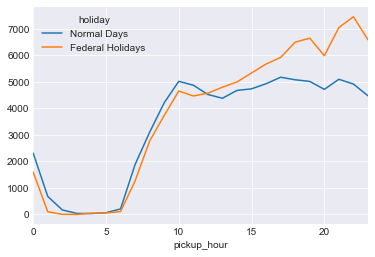

In [165]:
distance_df[["Normal Days", "Federal Holidays"]].plot(kind="line")